In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("EX1") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.4-spark3.5-s_2.12") \
    .getOrCreate()
    


In [19]:
from graphframes import GraphFrame

In [20]:
nodes = [(1, "Alice", 30), (2, "Bob", 25), (3,"Charlie", 45)]

In [21]:
 edges = [
     (1,2,"friend"),
     (2,1,"friend"),
     (2,3,"friend"),
     (3,2,"enemy"),
 ]

In [22]:
edges_df = spark.createDataFrame(edges, ["src","dst", "relationship"])

In [23]:
nodes_df = spark.createDataFrame(nodes,["id","name", "age"])

In [24]:
g = GraphFrame(nodes_df,edges_df)

In [11]:
g

GraphFrame(v:[id: bigint, name: string ... 1 more field], e:[src: bigint, dst: bigint ... 1 more field])

In [13]:
g.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  2|       2|
|  1|       1|
|  3|       1|
+---+--------+



In [14]:
g.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  1|        1|
|  2|        2|
|  3|        1|
+---+---------+



In [16]:
g.degrees.show()

+---+------+
| id|degree|
+---+------+
|  1|     2|
|  2|     4|
|  3|     2|
+---+------+



In [17]:
g.vertices.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  1|  Alice| 30|
|  2|    Bob| 25|
|  3|Charlie| 45|
+---+-------+---+



In [25]:
g.edges.show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  1|  2|      friend|
|  2|  1|      friend|
|  2|  3|      friend|
|  3|  2|       enemy|
+---+---+------------+



In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
edges_with_labels = g.edges.select("src", "dst", "relationship").rdd.map(lambda row: (row.src, row.dst, row.relationship)).collect()


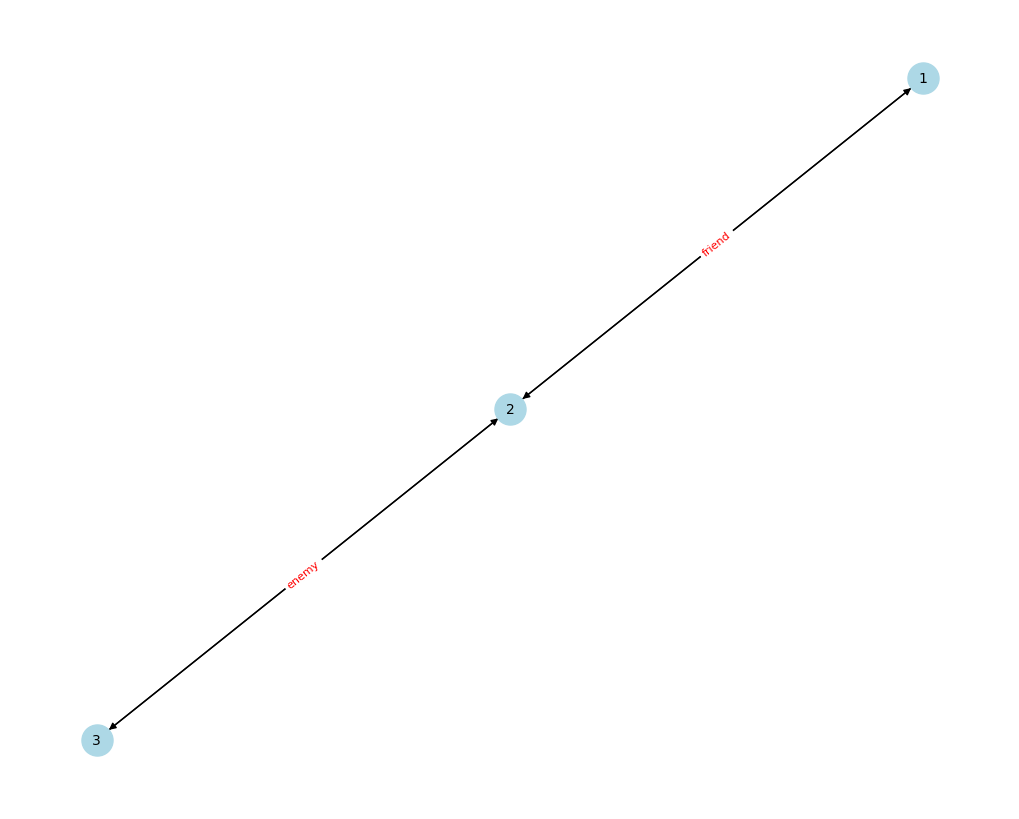

In [29]:
# Criar grafo NetworkX
nx_graph = nx.DiGraph()  # Use nx.Graph() se for não-direcionado

# Adicionar arestas com labels
for src, dst, relationship in edges_with_labels:
    nx_graph.add_edge(src, dst, label=relationship)

# Layout para o desenho
pos = nx.spring_layout(nx_graph)

# Desenhar nós e arestas
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, arrows=True)

# Pegar labels das arestas
edge_labels = nx.get_edge_attributes(nx_graph, 'label')

# Desenhar labels das arestas
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.show()